# Support Vector Machines

(Based on an example from VanderPlas, *Python Data Science Handbook*: https://jakevdp.github.io/PythonDataScienceHandbook/)

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs, make_circles
from sklearn.svm import SVC

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
import seaborn as sns; sns.set()

#### Some basic plotting functions

In [2]:
def plot_sets(Xs, ys, axes=None):
    """Plots a 2-dimensional (X), 2-class (y) data-set."""
    axes = axes or plt
        
    X0, X1 = Xs[ys==0], Xs[ys!=0]
    axes.scatter(X0[:, 0], X0[:, 1], c='blue', s=50)
    axes.scatter(X1[:, 0], X1[:, 1], c='red', s=50, marker='D')

def plot_sets_3d(Xs, ys):
    """Plots a 3-dimensional (X), 2-class (y) data-set."""
    axes = plt.axes(projection='3d')
        
    X0, X1 = Xs[ys==0], Xs[ys!=0]
    axes.scatter(X0[:, 0], X0[:, 1], X0[:, 2], c='blue', s=50)
    axes.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c='red', s=50, marker='D')

#### More complex plotting for SVMs

In [3]:
def plot_svc_decision_function(model, axes=None, plot_support=True):
    """Plot the decision function for a 2D SVC (Support Vector Classifier)."""
    axes = axes or plt.gca()
    xlim = axes.get_xlim()
    ylim = axes.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    axes.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        axes.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=200, linewidth=2, c='black', marker='x')
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    
def plot_svm(N=10, axes=None):
    """Generates some 2-dimensional data-blobs of size 200.
       Fits a SVC to the first N elements of that data, and shows 
       the resulting model boundaries over the data itself."""
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=10)
    model.fit(X, y)
    
    axes = axes or plt.gca()
    plot_sets(X, y, axes)
    
    axes.set_xlim(-1, 4)
    axes.set_ylim(-1, 6)
    plot_svc_decision_function(model, axes)

## Motivating Support Vector Machines

Support vector machines (SVMs) are a particularly powerful and flexible class of supervised algorithms for both classification and regression. Here, we will consider their use for classification.  Consider a case with two well-separated sets of points:

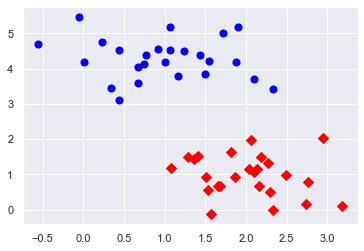

In [4]:
Xs, ys = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
    
plot_sets(Xs, ys)

A linear classifier for such data would have no problem finding a separating line, but there is a problem:  obviously there are all sorts of lines that can separate these data sets.

## Support Vector Machines: Maximizing the *Margin*

Support vector machines offer one way to improve on this: rather than simply drawing any line between the classes, we can try to draw one that has the widest *margin*, i.e. the distance on each side to the nearest data points.

### Fitting a support vector machine

Let's see the result of an actual fit to this data: we will use Scikit-Learn's support vector classifier to train an SVM model on this data.
Since we want a linear separator, we will specify that the model should use a linear kernel.  We also set the ``C`` parameter to a large number.  This value, which controls *regularization*, controls how sensitive the algorithm is to noisiness.  According to the documentation:

> ``C`` is ``1`` by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it.

We will play around with this parameter some more later on.

In [5]:
model = SVC(kernel='linear', C=100)
model.fit(Xs, ys)

SVC(C=100, kernel='linear')

The following function will plots the SVM decision boundaries, with their margins:

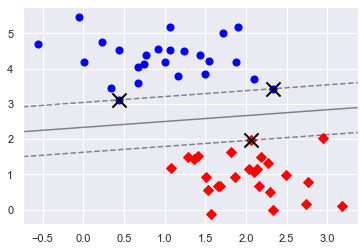

In [6]:
plot_sets(Xs, ys)
plot_svc_decision_function(model)

The solid line in the resulting plot maximizes the margin between the two sets of points; as with other linear methods, it is where the function associated with the SVM model is ``0``.  The dashed lines are the margins (where the function is ``+1`` and ``-1``).
The points right on the margins, indicated by the black X's, are the *support vectors*, and give the algorithm its name.
In Scikit-Learn, the identity of these points are stored in the ``support_vectors_`` attribute of the classifier:

In [7]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

A key to this classifier's success is that for the fit, only the position of the support vectors matter; any points further from the margin which are on the correct side do not modify the fit!
Technically, this is because these points do not contribute to the loss function used to fit the model, so their position and number do not matter so long as they do not cross the margin.

We can see this, for example, if we plot the model learned from the first 60 points and first 120 points of this dataset:

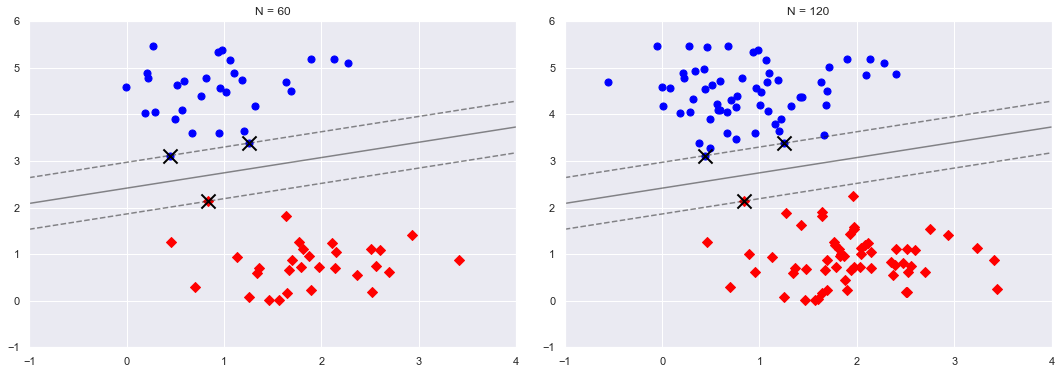

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axis, N in zip(axes, [60, 120]):
    plot_svm(N, axis)
    axis.set_title('N = {0}'.format(N))

### Beyond linear boundaries: Kernel SVM

Where SVM becomes extremely powerful is when it is combined with *kernels*.
In general, these are functions that project our data into higher-dimensional space, using things like polynomials and/or Gaussian basis functions, and which are thereby able to fit for nonlinear relationships with a linear classifier.

In SVM models, we can use a version of the same idea, especially when dealing with data that is not linearly separable:

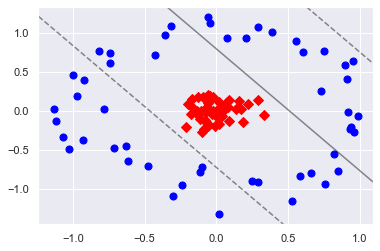

In [9]:
Xs, ys = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(Xs, ys)

plot_sets(Xs, ys)
plot_svc_decision_function(clf, plot_support=False);

It is clear that no linear discrimination will *ever* be able to separate this data.  (And if you run the prior code many times, you will get many different linear separators, all equally "good.")
But we can project the data into a higher dimension such that a linear separator *would* be sufficient.
For example, one simple projection we could use would be to compute a *radial basis function* (RBF), which the SVM will end up centering on the middle clump:

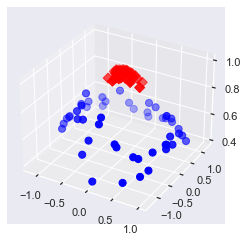

In [10]:
def distance(x, z):
    sq_diffs = np.square(x - z)
    return np.sum(sq_diffs, axis=1)
    
def rbf(Xs, target, sigma=1):
    dist = distance(Xs, target)
    exponent = -(dist / (2 * sigma * sigma))
    out = np.exp(exponent)
    return out

target = np.array([np.median(Xs[:,0]), np.median(Xs[:,1])])
rbf_values = rbf(Xs, target)
Xs_with_rbf = np.column_stack((Xs, rbf_values))
    
plot_sets_3d(Xs_with_rbf, ys)

We can also build an SVM classifier (SVC) that uses this type of kernel to transform its data.

In [11]:
clf = SVC(kernel='rbf', C=10, gamma='auto')
clf.fit(Xs, ys)

SVC(C=10, gamma='auto')

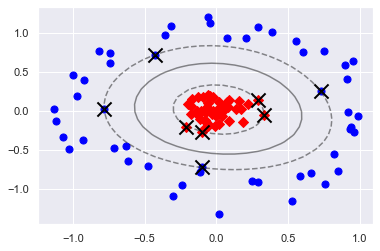

In [12]:
plot_sets(Xs, ys)
plot_svc_decision_function(clf)

Using this kernelized support vector machine, we learn a suitable nonlinear decision boundary.
This kernel transformation strategy is used often in machine learning to turn fast linear methods into fast nonlinear methods, especially for models in which the kernel trick can be used.

### Softening Margins

Our discussion thus far has centered around very clean datasets, in which a perfect decision boundary exists.
But what if your data has some amount of overlap?
For example, you may have data like this:

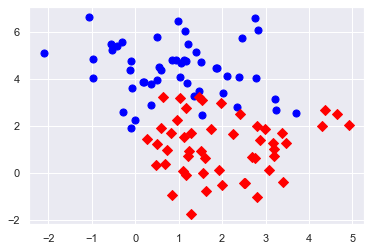

In [13]:
Xs, ys = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plot_sets(Xs, ys)

To handle this case, the SVM implementation has a bit of a fudge-factor which "softens" the margin: that is, it allows some of the points to creep into the margin if that allows a better fit.
The hardness of the margin is controlled by a tuning parameter, most often known as $C$.
For very large $C$, the margin is hard, and points cannot lie in it.
For smaller $C$, the margin is softer, and can grow to encompass some points.

The plot shown below gives a visual picture of how a changing $C$ parameter affects the final fit, via the softening of the margin:

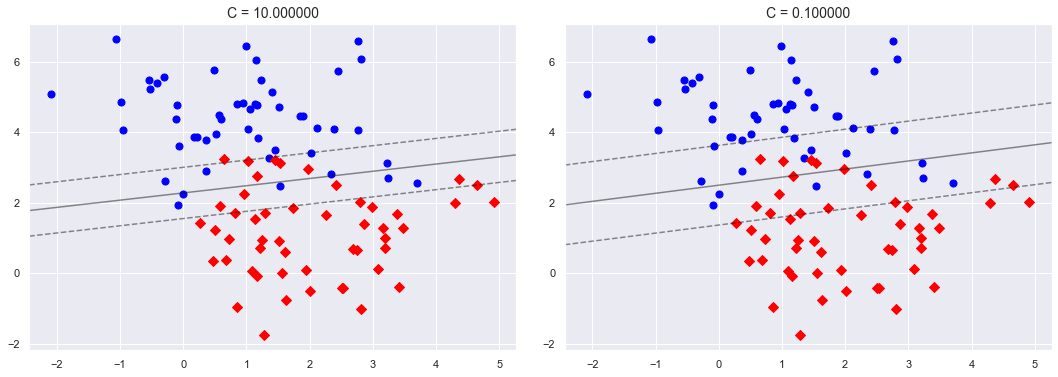

In [14]:
Xs, ys = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# Play with the two values (10.0, 0.1) to experiment with 
# harder margins (higher values) or softer (lower).
for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(Xs, ys)
    plot_sets(Xs, ys, axi)
    
    # If you want to see the support vectors, toggle plot_support.
    plot_svc_decision_function(model, axi, plot_support=False)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:f}'.format(C), size=14)

The optimal value of the $C$ parameter will depend on your dataset, and should be tuned using cross-validation.

## Support Vector Machine Summary

We have seen here a brief intuitive introduction to the principals behind support vector machines.
These methods are a powerful classification method for a number of reasons:

- Their dependence on relatively few support vectors means that they are very compact models, and take up very little memory.
- Once the model is trained, the prediction phase is very fast.
- Because they are affected only by points near the margin, they work well with high-dimensional data—even data with more dimensions than samples, which is a challenging regime for other algorithms.
- Their integration with kernel methods makes them very versatile, able to adapt to many types of data.

However, SVMs have several disadvantages as well:

- The scaling with the number of samples $N$ is $\mathcal{O}[N^3]$ at worst, or $\mathcal{O}[N^2]$ for efficient implementations. For large numbers of training samples, this computational cost can be prohibitive.
- The results are strongly dependent on a suitable choice for the softening parameter $C$. This must be carefully chosen via cross-validation, which can be expensive as datasets grow in size.

With those traits in mind, I generally only turn to SVMs once other simpler, faster, and less tuning-intensive methods have been shown to be insufficient for my needs.
Nevertheless, if you have the CPU cycles to commit to training and cross-validating an SVM on your data, the method can lead to excellent results.